# Comparing the 1987, 1991, and 2019 Minnesota Twins

In [1]:
from pybaseball import schedule_and_record
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ws87 = schedule_and_record(1987, "MIN")
ws91 = schedule_and_record(1991, "MIN")
curr = schedule_and_record(2019, "MIN")

## Summary
The 2019 Twins have the highest average runs per game, as well as the shortest losing streak at just 2 games.  The 1991 Twins had the longest winning streak out of the three, at 15 games.

In [3]:
ws87.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,162.000000,162.000000,162.000000,162.000000,159.000000,162.000000
mean,4.851852,4.975309,9.092593,1.376543,24919.937107,0.240741
std,3.272741,3.336139,0.598191,0.870607,10830.384820,2.353286
min,0.000000,0.000000,5.000000,1.000000,6226.000000,-6.000000
25%,2.000000,2.000000,9.000000,1.000000,17363.500000,-1.000000
50%,4.000000,4.500000,9.000000,1.000000,23531.000000,1.000000
75%,7.000000,7.000000,9.000000,1.000000,33194.000000,2.000000
max,14.000000,16.000000,13.000000,5.000000,53106.000000,7.000000


In [4]:
ws91.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,4.790123,4.024691,9.154321,2.493827,28587.888889,0.975309
std,3.069449,2.839278,0.529514,2.094794,12023.751823,3.363950
min,0.000000,0.000000,9.000000,1.000000,5003.000000,-7.000000
25%,3.000000,2.000000,9.000000,1.000000,18796.250000,-1.000000
50%,4.000000,4.000000,9.000000,1.000000,27542.500000,1.000000
75%,7.000000,5.000000,9.000000,5.000000,37620.500000,2.000000
max,14.000000,15.000000,12.000000,7.000000,55158.000000,15.000000


In [5]:
curr.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,143.000000,143.000000,143.000000,143.000000,142.000000,143.000000
mean,5.825175,4.650350,9.216783,1.062937,26276.267606,0.755245
std,3.566895,2.986492,1.095058,0.295906,9338.402021,1.997240
min,0.000000,0.000000,8.000000,1.000000,8064.000000,-4.000000
25%,3.000000,3.000000,9.000000,1.000000,17271.500000,-1.000000
50%,5.000000,4.000000,9.000000,1.000000,27751.500000,1.000000
75%,8.000000,6.000000,9.000000,1.000000,32827.000000,2.000000
max,18.000000,14.000000,18.000000,3.000000,44693.000000,6.000000


# Plot Wins

In [6]:
ws87["win-count"] = np.where(ws87["W/L"]=="W", 1, 0).cumsum()
ws91["win-count"] = np.where(ws91["W/L"] == "W", 1, 0).cumsum()
curr["win-count"] = np.where(curr["W/L"] == "W", 1, 0).cumsum()

Text(0.5, 1.0, 'Record Throughout Season')

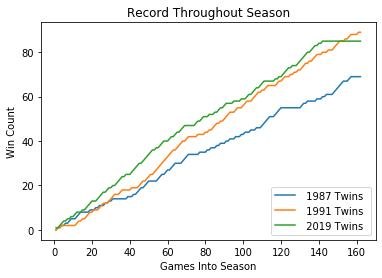

In [7]:
plt.plot(ws87["win-count"], label= " 1987 Twins ")
plt.plot(ws91["win-count"], label= " 1991 Twins ")
plt.plot(curr["win-count"], label= " 2019 Twins ")
plt.legend(loc=4)
plt.xlabel("Games Into Season")
plt.ylabel("Win Count")
plt.title("Record Throughout Season")

## Perform linear regression to project the rest of the 2019 season

In [8]:
games_played = 0
for item in curr["W/L"]:
    if item=="W" or item=="L":
        games_played +=1
print("Number of Games Played: "+str(games_played))

y = np.array(curr["win-count"][:games_played])
x = np.array([x+1 for x in range(games_played)])

Number of Games Played: 139


In [9]:
m = (len(x)*np.sum(x*y)-np.sum(x)*np.sum(y))/(len(x)*np.sum(x*x) - np.sum(x)**2)
b = (np.sum(y)-m*np.sum(x))/len(x)
print(str(m)+"x + "+str(b))

0.5785423834845167x + 2.6243353143572152


In [10]:
def predictWins(x):
    return(m*x+b)

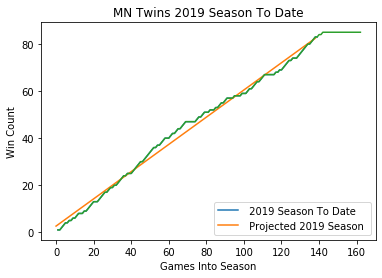

In [11]:
vec = np.arange(games_played)
plt.plot(x,y, label=" 2019 Season To Date ")
plt.plot(vec, predictWins(vec), label=" Projected 2019 Season ")
plt.legend(loc=4)
plt.xlabel("Games Into Season")
plt.ylabel("Win Count")
plt.title("MN Twins 2019 Season To Date")
plt.plot(curr["win-count"], label= " 2019 Twins To Date")

Text(0.5, 1.0, 'Record Throughout Season')

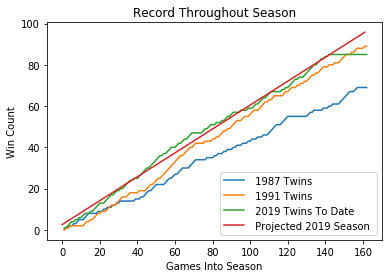

In [12]:
total_games = np.arange(162)

plt.plot(ws87["win-count"], label= " 1987 Twins ")
plt.plot(ws91["win-count"], label= " 1991 Twins ")
plt.plot(curr["win-count"], label= " 2019 Twins To Date")
plt.plot(total_games, predictWins(total_games), label=" Projected 2019 Season ")
plt.legend(loc=4)
plt.xlabel("Games Into Season")
plt.ylabel("Win Count")
plt.title("Record Throughout Season")

In [13]:
print("Projected Total Wins: "+str(int(predictWins(162))))

Projected Total Wins: 96


# Run Differential Comparison

In [14]:
ws87["scorediff"] = (ws87["R"] - ws87["RA"]).cumsum()
ws91["scorediff"] = (ws91["R"] - ws91["RA"]).cumsum()
curr["scorediff"] = (curr["R"] - curr["RA"]).cumsum()

Text(0.5, 1.0, 'Cumulative Run Differential')

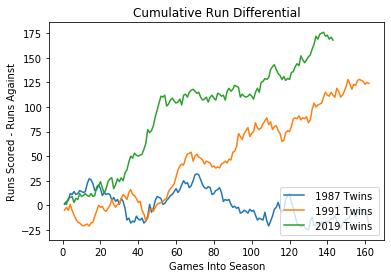

In [15]:
plt.plot(ws87["scorediff"], label= " 1987 Twins ")
plt.plot(ws91["scorediff"], label= " 1991 Twins ")
plt.plot(curr["scorediff"], label= " 2019 Twins ")
plt.legend(loc=4)
plt.xlabel("Games Into Season")
plt.ylabel("Runs Scored - Runs Against")
plt.title("Cumulative Run Differential")

In [16]:
y = np.array(curr["scorediff"][:games_played])
x = np.array([x+1 for x in range(games_played)])

In [17]:
m = (len(x)*np.sum(x*y)-np.sum(x)*np.sum(y))/(len(x)*np.sum(x*x) - np.sum(x)**2)
b = (np.sum(y)-m*np.sum(x))/len(x)
print(str(m)+"x + "+str(b))

1.1765360382501453x + 8.49139818579918


In [18]:
def predictDiff(x):
    return(m*x+b)

Text(0.5, 1.0, 'MN Twins 2019 Season To Date')

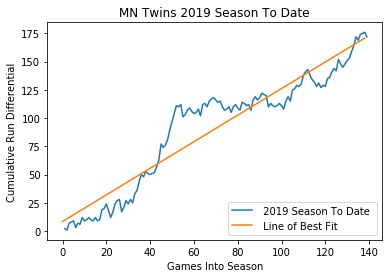

In [19]:
vec = np.arange(games_played)
plt.plot(x,y, label=" 2019 Season To Date ")
plt.plot(vec, predictDiff(vec), label=" Line of Best Fit ")
plt.legend(loc=4)
plt.xlabel("Games Into Season")
plt.ylabel("Cumulative Run Differential")
plt.title("MN Twins 2019 Season To Date")

Text(0.5, 1.0, 'Cumulative Run Differential')

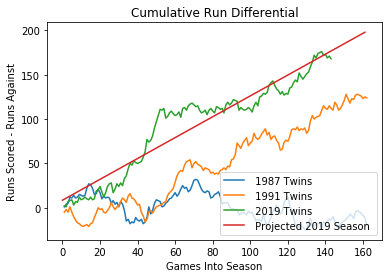

In [20]:
plt.plot(ws87["scorediff"], label= " 1987 Twins ")
plt.plot(ws91["scorediff"], label= " 1991 Twins ")
plt.plot(curr["scorediff"], label= " 2019 Twins ")
plt.plot(total_games, predictDiff(total_games), label=" Projected 2019 Season ")
plt.legend(loc=4)
plt.xlabel("Games Into Season")
plt.ylabel("Runs Scored - Runs Against")
plt.title("Cumulative Run Differential")

In [21]:
print("Projected Cumulative Run Differential: "+str(int(predictDiff(162))))

Projected Cumulative Run Differential: 199
